# EE 782 Assignment 1
Shreyas Patil  
200260052

### Question 1

#### (a)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read the data files of the stocks AAPL, AMZN, BA, DIS
# reference: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

apple = pd.read_csv('drive/MyDrive/EE782/AAPL_1min.txt', names=['Date Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
amazon = pd.read_csv('drive/MyDrive/EE782/AMZN_1min.txt', names=['Date Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
boeing =  pd.read_csv('drive/MyDrive/EE782/BA_1min.txt', names=['Date Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
disney = pd.read_csv('drive/MyDrive/EE782/DIS_1min.txt', names=['Date Time', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [ ]:
# visualize one of the above pandas dataframe
apple.head(10)

,Date Time,Open,High,Low,Close,Volume
0,2005-01-03 08:00:00,0.9939,0.9944,0.9939,0.9944,39200
1,2005-01-03 08:02:00,0.9863,0.9863,0.9863,0.9863,304360
2,2005-01-03 08:03:00,0.9955,0.9956,0.9955,0.9956,16800
3,2005-01-03 08:04:00,0.9962,0.9985,0.9962,0.9985,161504
4,2005-01-03 08:07:00,0.9971,0.9971,0.9970,0.9970,50400
5,2005-01-03 08:08:00,0.9962,0.9970,0.9962,0.9970,16800
6,2005-01-03 08:09:00,0.9962,0.9970,0.9962,0.9970,117600
7,2005-01-03 08:10:00,0.9962,0.9962,0.9962,0.9962,28000
8,2005-01-03 08:13:00,0.9955,0.9955,0.9955,0.9955,16800
9,2005-01-03 08:14:00,0.9955,0.9962,0.9955,0.9955,78400


In [ ]:
# code for splitting two columns directly from: https://stackoverflow.com/questions/14745022/how-to-split-a-dataframe-string-column-into-two-columns
# another resource referred: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html

# split 'Date Time' column into Date and Time columns

apple[['_Date', 'Time']] = apple['Date Time'].str.split(' ', 1, expand=True)
amazon[['_Date', 'Time']] = amazon['Date Time'].str.split(' ', 1, expand=True)
boeing[['_Date', 'Time']] = boeing['Date Time'].str.split(' ', 1, expand=True)
disney[['_Date', 'Time']] = disney['Date Time'].str.split(' ', 1, expand=True)

In [ ]:
# split date and time into year, month, date, hour, minute, and retain only required columns

apple[['Year', 'Month', 'Date']] = apple['_Date'].str.split('-', 2, expand=True)
apple[['Hour', 'Min', 'Second']] = apple['Time'].str.split(':', 2, expand=True)
apple = apple[['Year', 'Month', 'Date', 'Hour', 'Min', 'Open', 'High', 'Low', 'Close', 'Volume']]

amazon[['Year', 'Month', 'Date']] = amazon['_Date'].str.split('-', 2, expand=True)
amazon[['Hour', 'Min', 'Second']] = amazon['Time'].str.split(':', 2, expand=True)
amazon = amazon[['Year', 'Month', 'Date', 'Hour', 'Min', 'Open', 'High', 'Low', 'Close', 'Volume']]

boeing[['Year', 'Month', 'Date']] = boeing['_Date'].str.split('-', 2, expand=True)
boeing[['Hour', 'Min', 'Second']] = boeing['Time'].str.split(':', 2, expand=True)
boeing = boeing[['Year', 'Month', 'Date', 'Hour', 'Min', 'Open', 'High', 'Low', 'Close', 'Volume']]

disney[['Year', 'Month', 'Date']] = disney['_Date'].str.split('-', 2, expand=True)
disney[['Hour', 'Min', 'Second']] = disney['Time'].str.split(':', 2, expand=True)
disney = disney[['Year', 'Month', 'Date', 'Hour', 'Min', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [ ]:
# view part of data as table
apple.head()

,Year,Month,Date,Hour,Min,Open,High,Low,Close,Volume
0,2005,01,03,08,00,0.9939,0.9944,0.9939,0.9944,39200
1,2005,01,03,08,02,0.9863,0.9863,0.9863,0.9863,304360
2,2005,01,03,08,03,0.9955,0.9956,0.9955,0.9956,16800
3,2005,01,03,08,04,0.9962,0.9985,0.9962,0.9985,161504
4,2005,01,03,08,07,0.9971,0.9971,0.9970,0.9970,50400


In [ ]:
# ref: https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
# ref: https://saturncloud.io/blog/how-to-select-rows-based-on-multiple-column-values-in-pandas-dataframe/#:~:text=In%20pandas%2C%20you%20can%20filter,boolean%20conditions%20using%20the%20%26%20operator.
# define dataframes corresponding to particular years

apple15 = apple.loc[apple['Year'] == '2015']

# drop data out of trading hours
apple15 = apple15.drop(apple15[apple15.Hour.astype('int64') < 9].index)
apple15 = apple15.drop(apple15[apple15.Hour.astype('int64') > 15].index)
apple15 = apple15.drop(apple15[(apple15.Hour.astype('int64') == 9) & (apple15.Min.astype('int64') < 30)].index)

In [ ]:
apple15.head()

,Year,Month,Date,Hour,Min,Open,High,Low,Close,Volume
1495750,2015,01,02,09,30,25.1814,25.1927,25.1384,25.1475,2828740
1495751,2015,01,02,09,31,25.1475,25.1610,25.1249,25.1610,1146024
1495752,2015,01,02,09,32,25.1610,25.1791,25.1520,25.1610,924048
1495753,2015,01,02,09,33,25.1592,25.1599,25.1204,25.1339,1041160
1495754,2015,01,02,09,34,25.1339,25.1464,25.1023,25.1023,994128


In [ ]:
apple15.tail()

,Year,Month,Date,Hour,Min,Open,High,Low,Close,Volume
1669692,2015,12,31,15,55,24.2558,24.2558,24.2374,24.2411,658552
1669693,2015,12,31,15,56,24.2397,24.2420,24.2190,24.2190,863936
1669694,2015,12,31,15,57,24.2213,24.2466,24.2190,24.2443,860932
1669695,2015,12,31,15,58,24.2420,24.2443,24.2328,24.2328,1137588
1669696,2015,12,31,15,59,24.2351,24.2397,24.1914,24.1937,2074388


In [ ]:
# repeat above data filtering for other stocks

amazon15 = amazon.loc[amazon['Year'] == '2015']
amazon15 = amazon15.drop(amazon15[amazon15.Hour.astype('int64') < 9].index)
amazon15 = amazon15.drop(amazon15[amazon15.Hour.astype('int64') > 15].index)
amazon15 = amazon15.drop(amazon15[(amazon15.Hour.astype('int64') == 9) & (amazon15.Min.astype('int64') < 30)].index)

boeing15 = boeing.loc[boeing['Year'] == '2015']
boeing15 = boeing15.drop(boeing15[boeing15.Hour.astype('int64') < 9].index)
boeing15 = boeing15.drop(boeing15[boeing15.Hour.astype('int64') > 15].index)
boeing15 = boeing15.drop(boeing15[(boeing15.Hour.astype('int64') == 9) & (boeing15.Min.astype('int64') < 30)].index)

disney15 = disney.loc[disney['Year'] == '2015']
disney15 = disney15.drop(disney15[disney15.Hour.astype('int64') < 9].index)
disney15 = disney15.drop(disney15[disney15.Hour.astype('int64') > 15].index)
disney15 = disney15.drop(disney15[(disney15.Hour.astype('int64') == 9) & (disney15.Min.astype('int64') < 30)].index)

In [ ]:
# for min by min plotting, let's select the first day of trading for each of the stocks and plot

apple15_02 = apple15.loc[(apple15['Month'] == '01') & (apple15['Date'] == '02')]
amazon15_02 = amazon15.loc[(amazon15['Month'] == '01') & (amazon15['Date'] == '02')]
boeing15_02 = boeing15.loc[(boeing15['Month'] == '01') & (boeing15['Date'] == '02')]
disney15_02 = disney15.loc[(disney15['Month'] == '01') & (disney15['Date'] == '02')]

In [ ]:
# ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# need to reset the indices for convenience in iterating over columns as lists

apple15_02 = apple15_02.reset_index()
amazon15_02 = amazon15_02.reset_index()
boeing15_02 = boeing15_02.reset_index()
disney15_02 = disney15_02.reset_index()

In [ ]:
# define the time axis for plots in hour scale

x1 = apple15_02.Hour.astype(int) + apple15_02.Min.astype(int)/60
x2 = amazon15_02.Hour.astype(int) + amazon15_02.Min.astype(int)/60
x3 = boeing15_02.Hour.astype(int) + boeing15_02.Min.astype(int)/60
x4 = disney15_02.Hour.astype(int) + disney15_02.Min.astype(int)/60

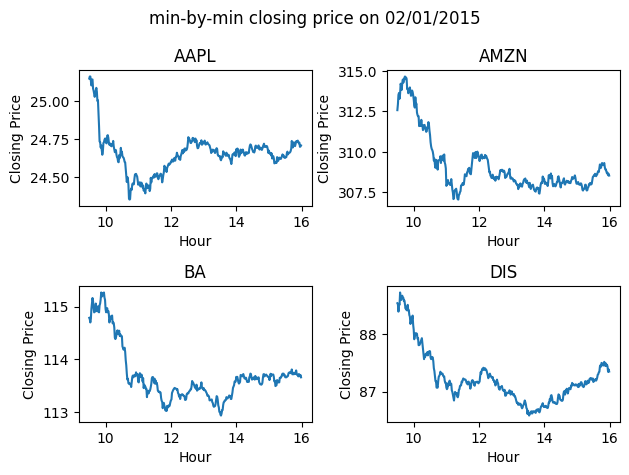

In [ ]:
# ref: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# ref: https://stackoverflow.com/questions/9603230/how-to-use-matplotlib-tight-layout-with-figure

# Plots of min-by-min closing prices

fig, ax = plt.subplots(2,2)
fig.suptitle('min-by-min closing price on 02/01/2015')

ax[0, 0].plot(x1, apple15_02.Close.astype('float64'))
ax[0, 0].set_title('AAPL')

ax[0, 1].plot(x2, amazon15_02.Close.astype('float64'))
ax[0, 1].set_title('AMZN')

ax[1, 0].plot(x3, boeing15_02.Close.astype('float64'))
ax[1, 0].set_title('BA')

ax[1, 1].plot(x4, disney15_02.Close.astype('float64'))
ax[1, 1].set_title('DIS')

for axs in ax.flat:
  axs.set(xlabel = 'Hour', ylabel = 'Closing Price')

fig.tight_layout()
plt.show()

#### (b)

In [ ]:
# day-by-day closing price lists
apple15_day_close = []
amazon15_day_close = []
boeing15_day_close = []
disney15_day_close = []

# time axis lists
y1, y2, y3, y4 = [], [], [], []

# retaining the data of only May 2015
apple15i = apple15.loc[apple15.Month.astype(int) == 5]
amazon15i = amazon15.loc[amazon15.Month.astype(int) == 5]
boeing15i = boeing15.loc[boeing15.Month.astype(int) == 5]
disney15i = disney15.loc[disney15.Month.astype(int) == 5]

# iterate over trading days for each stock
# for each trading day, append the last closing price to the respective list

# also append the date in the decimal format month + date/(number of trading days in month)

for j in sorted(apple15i.Date.astype(int).unique()):
  apple15ij = apple15i.loc[apple15i.Date.astype(int) == j]
  apple15ij = apple15ij.reset_index()
  apple15_day_close.append(apple15ij.iloc[-1].Close)
  y1.append(j)

for j in sorted(amazon15i.Date.astype(int).unique()):
  amazon15ij = amazon15i.loc[amazon15i.Date.astype(int) == j]
  amazon15ij = amazon15ij.reset_index()
  amazon15_day_close.append(amazon15ij.iloc[-1].Close)
  y2.append(j)

for j in sorted(boeing15i.Date.astype(int).unique()):
  boeing15ij = boeing15i.loc[boeing15i.Date.astype(int) == j]
  boeing15ij = boeing15ij.reset_index()
  boeing15_day_close.append(boeing15ij.iloc[-1].Close)
  y3.append(j)

for j in sorted(disney15i.Date.astype(int).unique()):
  disney15ij = disney15i.loc[disney15i.Date.astype(int) == j]
  disney15ij = disney15ij.reset_index()
  disney15_day_close.append(disney15ij.iloc[-1].Close)
  y4.append(j)

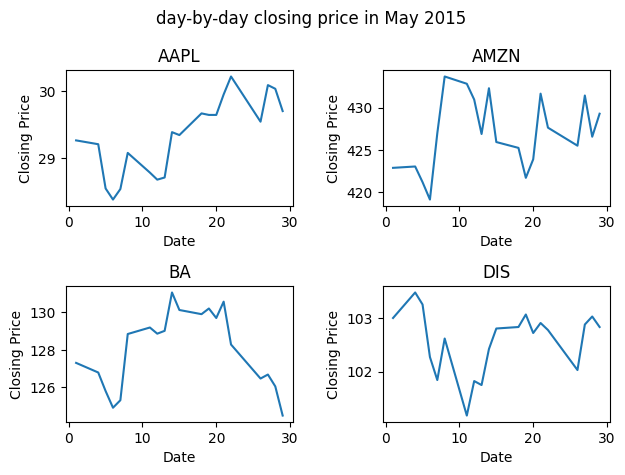

In [ ]:
# Plots of day-by-day closing prices

fig1, ax1 = plt.subplots(2,2)
fig1.suptitle('day-by-day closing price in May 2015')

ax1[0, 0].plot(y1, apple15_day_close)
ax1[0, 0].set_title('AAPL')

ax1[0, 1].plot(y2, amazon15_day_close)
ax1[0, 1].set_title('AMZN')

ax1[1, 0].plot(y3, boeing15_day_close)
ax1[1, 0].set_title('BA')

ax1[1, 1].plot(y4, disney15_day_close)
ax1[1, 1].set_title('DIS')

for axs in ax1.flat:
  axs.set(xlabel = 'Date', ylabel = 'Closing Price')

fig1.tight_layout()
plt.show()

#### (c)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# ref: https://plotly.com/python/candlestick-charts/
# code block imported from: https://stackoverflow.com/questions/64689342/plotly-how-to-add-volume-to-a-candlestick-chart

# All Candlestick charts are min-by-min and for the date 01/02/2015

In [ ]:
# Candlestick chart for Apple

# Create subplots and mention plot grid size
figc1 = make_subplots(rows=2, cols=1, shared_xaxes=True,
               vertical_spacing=0.1, subplot_titles=('OHLC', 'Volume'),
               row_width=[0.2, 0.7])

# Plot OHLC on 1st row
figc1.add_trace(go.Candlestick(x=apple15_02.Hour + ':' + apple15_02.Min, open=apple15_02.Open, high=apple15_02.High,
                low=apple15_02.Low, close=apple15_02.Close, name="AAPL Candlestick chart on 02/01/2015"),
                row=1, col=1
)

# Bar trace for volumes on 2nd row without legend
figc1.add_trace(go.Bar(x=apple15_02.Hour + ':' + apple15_02.Min, y=apple15_02.Volume, showlegend=False), row=2, col=1)

# Do not show OHLC's rangeslider plot
figc1.update(layout_xaxis_rangeslider_visible=False)
figc1.show()

In [ ]:
# Candlestick chart for Amazon

# Create subplots and mention plot grid size
figc2 = make_subplots(rows=2, cols=1, shared_xaxes=True,
               vertical_spacing=0.1, subplot_titles=('OHLC', 'Volume'),
               row_width=[0.2, 0.7])

# Plot OHLC on 1st row
figc2.add_trace(go.Candlestick(x=amazon15_02.Hour + ':' + amazon15_02.Min, open=amazon15_02.Open, high=amazon15_02.High,
                low=amazon15_02.Low, close=amazon15_02.Close, name="AMZN Candlestick chart on 02/01/2015"),
                row=1, col=1
)

# Bar trace for volumes on 2nd row without legend
figc2.add_trace(go.Bar(x=amazon15_02.Hour + ':' + amazon15_02.Min, y=amazon15_02.Volume, showlegend=False), row=2, col=1)

# Do not show OHLC's rangeslider plot
figc2.update(layout_xaxis_rangeslider_visible=False)
figc2.show()

In [ ]:
# Candlestick chart for Boeing

# Create subplots and mention plot grid size
figc3 = make_subplots(rows=2, cols=1, shared_xaxes=True,
               vertical_spacing=0.1, subplot_titles=('OHLC', 'Volume'),
               row_width=[0.2, 0.7])

# Plot OHLC on 1st row
figc3.add_trace(go.Candlestick(x=boeing15_02.Hour + ':' + boeing15_02.Min, open=boeing15_02.Open, high=boeing15_02.High,
                low=boeing15_02.Low, close=boeing15_02.Close, name="BA Candlestick chart on 02/01/2015"),
                row=1, col=1
)

# Bar trace for volumes on 2nd row without legend
figc3.add_trace(go.Bar(x=boeing15_02.Hour + ':' + boeing15_02.Min, y=boeing15_02.Volume, showlegend=False), row=2, col=1)

# Do not show OHLC's rangeslider plot
figc3.update(layout_xaxis_rangeslider_visible=False)
figc3.show()

In [ ]:
# Candlestick chart for Disney

# Create subplots and mention plot grid size
figc3 = make_subplots(rows=2, cols=1, shared_xaxes=True,
               vertical_spacing=0.1, subplot_titles=('OHLC', 'Volume'),
               row_width=[0.2, 0.7])

# Plot OHLC on 1st row
figc3.add_trace(go.Candlestick(x=disney15_02.Hour + ':' + disney15_02.Min, open=disney15_02.Open, high=disney15_02.High,
                low=disney15_02.Low, close=disney15_02.Close, name="DIS Candlestick chart on 02/01/2015"),
                row=1, col=1
)

# Bar trace for volumes on 2nd row without legend
figc3.add_trace(go.Bar(x=disney15_02.Hour + ':' + disney15_02.Min, y=disney15_02.Volume, showlegend=False), row=2, col=1)

# Do not show OHLC's rangeslider plot
figc3.update(layout_xaxis_rangeslider_visible=False)
figc3.show()

#### (d)

Observations:
1. There are some missing rows in min-by-min data, but within trading
hours they're quite rare in large companies like the ones I've chosen to plot above, so that shouldn't be too big of a problem.  
2. Data contains some datapoints outside of regular trading hours, these can be simply omitted.
3. Data for some of the days is entirely missing. But it's just that these were either weekends or public holidays and hence not trading sessions. These aren't a problem unless we include the date as a state element or parameter when implementing our model.
4. Sometimes what Stock Exchanges do when the prices of a particular stock rise or drop too much in a short period in a trading session is that they pause trading of that stock for a specific duration on that day. In such cases we might find that the data is missing for that duration, and it can't be particularly trained on as there's no trading happening in those durations. It is rare, especially in good company stocks, but just something we should make sure to check for in the dataset we are going to train. This must be done if we are training our model on datasets with duration of OHLC less than a day. We can just plot the min-by-min candlestick chart and check it.

### Question 2

Two normalization measures that are most prevalent in stock prices normalization are:
1. **Min-Max Scaling**  

  $$X_{normalized} = \dfrac{X-X_{min}}{X_{max}-X_{min}}$$
  Here,  
  $X_{normalized}$ is the normalized price/volume  
  $X$ is the curret price/volume  
  $X_{max}$ is the max price/volume of the stock in a given time period  
  $X_{min}$ is the min price/volume of the stock in a given time period  


2. **Z-Score Normalization**

  $$X_{normalized} = \dfrac{X-\mu}{\sigma}$$
  Here,  
  $X_{normalized}$ is the normalized price/volume  
  $X$ is the curret price/volume  
  $\mu$ is the average price/volume  
  $\sigma$ is the standard deviation of the price/volume  

Ref: https://itadviser.dev/stock-market-data-normalization-for-time-series/

In case of Z-Score Normalization for stock prices, for $\mu$ and $\sigma$, it would be better to calculate the average of High and Low for each row, and take their weighted mean with respective normalized volume (with min-max scaling) traded, and similarly weight each row for calculating standard deviation. And then use the obtained $\mu$ and $\sigma$ for each of the four OHLC columns. This might be a better way to normalize as compared to scaling each column with its respective unweighted mean and standard deviation because that would change the relation between the four OHLC values of each row when you normalize it in that way.  

This way of combining Z-Score and Min-Max Scaling might in fact work better while training the model because we have already taken the volume traded into account while scaling the prices, which helps predict the prices with a higher conviction.

In [ ]:
# Let's take the data amazon15_02 and normalize it with min-max scaling

# first convert the datatypes in the columns from string to float64
_amazon15_02 = amazon15_02
_amazon15_02[['Open', 'High', 'Low', 'Close', 'Volume']] = _amazon15_02[['Open', 'High', 'Low', 'Close', 'Volume']].astype('float64')

In [ ]:
# min-max scaling

amzn_price_max = np.max(_amazon15_02.High)
amzn_price_min = np.min(_amazon15_02.Low)

_amazon15_02.Open = (_amazon15_02.Open - amzn_price_min)/(amzn_price_max - amzn_price_min)
_amazon15_02.High = (_amazon15_02.High - amzn_price_min)/(amzn_price_max - amzn_price_min)
_amazon15_02.Low = (_amazon15_02.Low - amzn_price_min)/(amzn_price_max - amzn_price_min)
_amazon15_02.Close = (_amazon15_02.Close - amzn_price_min)/(amzn_price_max - amzn_price_min)

_amazon15_02.Volume = (_amazon15_02.Volume - np.min(_amazon15_02.Volume))/(np.max(_amazon15_02.Volume) - np.min(_amazon15_02.Volume))

In [ ]:
_amazon15_02 = _amazon15_02.drop('index', axis=1)
_amazon15_02

,Year,Month,Date,Hour,Min,Open,High,Low,Close,Volume
0,2015,01,02,09,30,0.721438,0.744544,0.661104,0.721438,0.966933
1,2015,01,02,09,31,0.738126,0.788190,0.725289,0.768806,0.364045
2,2015,01,02,09,32,0.812580,0.863928,0.766367,0.843389,0.508127
3,2015,01,02,09,33,0.827985,0.863928,0.808729,0.858793,0.258644
4,2015,01,02,09,34,0.843389,0.848524,0.780488,0.812323,0.233452
...,...,...,...,...,...,...,...,...,...,...
384,2015,01,02,15,55,0.240051,0.245186,0.210526,0.218228,0.370524
385,2015,01,02,15,56,0.223363,0.224647,0.191271,0.223363,0.342233
386,2015,01,02,15,57,0.222080,0.223363,0.184852,0.202824,0.459420
387,2015,01,02,15,58,0.206033,0.224647,0.193838,0.214377,0.367620


In [ ]:
# Now let's try the second method that I mentioned, combining both Z-Score and min-max scaling
# Let's take apple15_02

# first convert the datatypes in the columns from string to float64
_apple15_02 = apple15_02
_apple15_02[['Open', 'High', 'Low', 'Close', 'Volume']] = _apple15_02[['Open', 'High', 'Low', 'Close', 'Volume']].astype('float64')

_apple15_02.Volume = (_apple15_02.Volume - np.min(_apple15_02.Volume))/(np.max(_apple15_02.Volume) - np.min(_apple15_02.Volume))
_apple15_02_mean_price = sum(((_apple15_02.High + _apple15_02.Low)/2)*_apple15_02.Volume)/sum(_apple15_02.Volume) # weighted mean
_apple15_02_std_dev = np.sqrt(sum((((_apple15_02.High + _apple15_02.Low)/2 - _apple15_02_mean_price)**2)*_apple15_02.Volume)/sum(_apple15_02.Volume))

In [ ]:
_apple15_02.Open = (_apple15_02.Open - _apple15_02_mean_price)/_apple15_02_std_dev
_apple15_02.High = (_apple15_02.High - _apple15_02_mean_price)/_apple15_02_std_dev
_apple15_02.Low = (_apple15_02.Low - _apple15_02_mean_price)/_apple15_02_std_dev
_apple15_02.Close = (_apple15_02.Close - _apple15_02_mean_price)/_apple15_02_std_dev

In [ ]:
_apple15_02 = _apple15_02.drop('index', axis=1)
_apple15_02

,Year,Month,Date,Hour,Min,Open,High,Low,Close,Volume
0,2015,01,02,09,30,2.813155,2.875126,2.577334,2.627240,0.707474
1,2015,01,02,09,31,2.627240,2.701277,2.503298,2.701277,0.280070
2,2015,01,02,09,32,2.701277,2.800541,2.651919,2.701277,0.223689
3,2015,01,02,09,33,2.691406,2.695245,2.478619,2.552655,0.253435
4,2015,01,02,09,34,2.552655,2.621208,2.379355,2.379355,0.241489
...,...,...,...,...,...,...,...,...,...,...
385,2015,01,02,15,55,0.333749,0.383107,0.296457,0.296457,0.163928
386,2015,01,02,15,56,0.296457,0.333749,0.246551,0.321136,0.190552
387,2015,01,02,15,57,0.321136,0.333749,0.159900,0.172514,0.215292
388,2015,01,02,15,58,0.159900,0.259164,0.159900,0.184579,0.221946


### Question 3.

(a) High-Frequency Trading, but at the scale of a minute rather than seconds, since the smallest scale at which we have data is min-by-min.  
(b) Let the trade commission be 0.05% of the total trade value, and the buy-ask spread be about 0.1% given I'll train and test on Apple which is a large-cap stock.  
(c) Will be trading only one stock.

### Question 4.

In [6]:
import torch
import torch.nn as nn

In [7]:
# define device being used - CPU/GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
# Basic code structure obtained form ChatGPT

# define the LSTM module

class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size=1):
        super(StockLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer with 0.2 dropout
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout = 0.2)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, _ = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out

### Question 5.

The last two years' data is supposed to be left out for testing. But the last two years of which we have data are 2019 and 2020, the COVID years. Since they were not normal circumstances in the world, with a lot of travel and trade restrictions in place, training on pre-COVID years' data and testing on COVID years data would cause a distribution shift and of course the model will perform worse.  

Hence, we will rather use the data of 2017 and 2018 for testing, and use the data of 2015, and 2016 for training.

We choose only two years of data for training because we are performing High Frequency Trading, and our training samples would be of the length of 15 minutes length of min-by-min data per sample. We would have abundant data in two years worth of time.  
We also choose to go with the two years just prior to the test data because the price range would be closer to it in this period as compared to 5-10 years prior data which would've led to distribution shift again.

In [ ]:
apple_train = apple.loc[(apple['Year'].astype(int) >= 2010) & (apple['Year'].astype(int) <= 2016)]
apple_test = apple.loc[(apple['Year'] == '2017') | (apple['Year'] == '2018')]

# modify datatype from string to integer
apple_train[['Year', 'Month', 'Date', 'Hour', 'Min']] = apple_train[['Year', 'Month', 'Date', 'Hour', 'Min']].astype('int16')
apple_test[['Year', 'Month', 'Date', 'Hour', 'Min']] = apple_test[['Year', 'Month', 'Date', 'Hour', 'Min']].astype('int16')


# drop data out of trading hours

apple_train = apple_train.drop(apple_train[apple_train.Hour < 9].index)
apple_train = apple_train.drop(apple_train[apple_train.Hour > 15].index)
apple_train = apple_train.drop(apple_train[(apple_train.Hour == 9) & (apple_train.Min < 30)].index)

apple_test = apple_test.drop(apple_test[apple_test.Hour < 9].index)
apple_test = apple_test.drop(apple_test[apple_test.Hour > 15].index)
apple_test = apple_test.drop(apple_test[(apple_test.Hour == 9) & (apple_test.Min < 30)].index)

In [16]:
# modify datatype from string to float64
apple_train[['Open', 'High', 'Low', 'Close', 'Volume']] = apple_train[['Open', 'High', 'Low', 'Close', 'Volume']].astype('float64')
apple_test[['Open', 'High', 'Low', 'Close', 'Volume']] = apple_test[['Open', 'High', 'Low', 'Close', 'Volume']].astype('float64')

# reset index and drop the index axis
apple_train = apple_train.reset_index()
apple_train = apple_train.drop('index', axis=1)
apple_test = apple_test.reset_index()
apple_test = apple_test.drop('index', axis=1)

In [17]:
# Normalization

apple_train.Volume = (apple_train.Volume - np.min(apple_train.Volume))/(np.max(apple_train.Volume) - np.min(apple_train.Volume))
apple_train_mean_price = sum(((apple_train.High + apple_train.Low)/2)*apple_train.Volume)/sum(apple_train.Volume) # weighted mean
apple_train_std_dev = np.sqrt(sum((((apple_train.High + apple_train.Low)/2 - apple_train_mean_price)**2)*apple_train.Volume)/sum(apple_train.Volume))

apple_test.Volume = (apple_test.Volume - np.min(apple_test.Volume))/(np.max(apple_test.Volume) - np.min(apple_test.Volume))
apple_test_mean_price = sum(((apple_test.High + apple_test.Low)/2)*apple_test.Volume)/sum(apple_test.Volume) # weighted mean
apple_test_std_dev = np.sqrt(sum((((apple_test.High + apple_test.Low)/2 - apple_test_mean_price)**2)*apple_test.Volume)/sum(apple_test.Volume))

apple_train.Open = (apple_train.Open - apple_train_mean_price)/apple_train_std_dev/2
apple_train.High = (apple_train.High - apple_train_mean_price)/apple_train_std_dev/2
apple_train.Low = (apple_train.Low - apple_train_mean_price)/apple_train_std_dev/2
apple_train.Close = (apple_train.Close - apple_train_mean_price)/apple_train_std_dev/2

apple_test.Open = (apple_test.Open - apple_test_mean_price)/apple_test_std_dev/2
apple_test.High = (apple_test.High - apple_test_mean_price)/apple_test_std_dev/2
apple_test.Low = (apple_test.Low - apple_test_mean_price)/apple_test_std_dev/2
apple_test.Close = (apple_test.Close - apple_test_mean_price)/apple_test_std_dev/2

Note, during normalization, we divided $(X - \mu)$ by $2\sigma$ instead of $\sigma$ to rescale the data towards $(-1,1)$ since with $\sigma$ only it varied close to the range of $(-2,2)$.

In [ ]:
apple_train

,Year,Month,Date,Hour,Min,Open,High,Low,Close,Volume
0,2010,1,4,9,30,-0.687233,-0.686544,-0.688062,-0.687890,0.145591
1,2010,1,4,9,31,-0.687914,-0.687012,-0.687914,-0.687282,0.051910
2,2010,1,4,9,32,-0.687307,-0.686634,-0.687808,-0.686831,0.045021
3,2010,1,4,9,33,-0.686856,-0.686659,-0.687512,-0.687512,0.029512
4,2010,1,4,9,34,-0.687381,-0.687012,-0.687684,-0.687512,0.034210
...,...,...,...,...,...,...,...,...,...,...
685565,2016,12,30,15,55,1.006216,1.010171,1.006216,1.009876,0.007727
685566,2016,12,30,15,56,1.009876,1.009974,1.007800,1.008530,0.012390
685567,2016,12,30,15,57,1.008530,1.011033,1.007947,1.010647,0.012163
685568,2016,12,30,15,58,1.010647,1.011419,1.009687,1.010459,0.013346


In [ ]:
apple_test

,Year,Month,Date,Hour,Min,Open,High,Low,Close,Volume
0,2017,1,3,9,30,-1.033869,-1.032433,-1.039611,-1.032700,0.096109
1,2017,1,3,9,31,-1.032433,-1.026148,-1.034411,-1.026171,0.023660
2,2017,1,3,9,32,-1.026148,-1.024713,-1.026507,-1.025255,0.016559
3,2017,1,3,9,33,-1.025255,-1.025255,-1.030280,-1.028661,0.025782
4,2017,1,3,9,34,-1.028684,-1.026332,-1.028684,-1.027943,0.016943
...,...,...,...,...,...,...,...,...,...,...
195356,2018,12,31,15,55,-0.203919,-0.198551,-0.204286,-0.202621,0.027109
195357,2018,12,31,15,56,-0.202621,-0.202621,-0.216130,-0.211877,0.040034
195358,2018,12,31,15,57,-0.212060,-0.209288,-0.214099,-0.211319,0.013584
195359,2018,12,31,15,58,-0.211510,-0.210212,-0.213358,-0.212060,0.017142


Dataloader

In [18]:
# import libraries required
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# tqdm is used for progress bar
# ref: https://tqdm.github.io/

In [19]:
# Starter code from ChatGPT

df_train = apple_train[['Open', 'High', 'Low', 'Close', 'Volume']]    #apple_train[['Open', 'High', 'Low', 'Close', 'Volume']]
df_test = apple_test[['Open', 'High', 'Low', 'Close', 'Volume']]    #apple_test[['Open', 'High', 'Low', 'Close', 'Volume']]

# define sequence length of LSTM, i.e., previous minutes used for predicting next closing price
sequence_length = 50

sequences_train = []
targets_train = []

sequences_test = []
targets_test = []

# create sequences, with spacings of 5 minutes for train, and 1 minute for test
# i.e., if sequence 'n' is from 12:10 to 12:59, next sequence in train would be from 12:15 to 13:04
# This spacing is just to have lesser data points to train on, and prevent overfit and to train faster
for i in tqdm(range(0, len(df_train) - sequence_length, 5)):
  sequences_train.append(df_train.iloc[i:i+sequence_length].values)
  targets_train.append([df_train.iloc[i+sequence_length]['Close']])

for i in tqdm(range(len(df_test) - sequence_length)):
  sequences_test.append(df_test.iloc[i:i+sequence_length].values)
  targets_test.append([df_test.iloc[i+sequence_length]['Close']])

# Convert sequences and targets to NumPy arrays
sequences_train = np.array(sequences_train)
targets_train = np.array(targets_train)

sequences_test = np.array(sequences_test)
targets_test = np.array(targets_test)

# Create a custom DataLoader
class StockDataset(Dataset):
    def __init__(self, sequences, targets):
        self.sequences = torch.from_numpy(sequences).float()
        self.targets = torch.from_numpy(targets).float()

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.targets[idx]

# Create DataLoaders
stock_dataset_train = StockDataset(sequences_train, targets_train)
dataloader_train = DataLoader(stock_dataset_train, batch_size=32, shuffle=False)
stock_dataset_test = StockDataset(sequences_test, targets_test)
dataloader_test = DataLoader(stock_dataset_test, batch_size=32, shuffle=False)

100%|██████████| 195311/195311 [00:16<00:00, 12097.19it/s]


### Question 6.

Targets are closing price of the next minute for each sequence

The input at each element of the sequence is a torch tensor containing Open, High, Low, Close, and Volume values of the specific minute. Thus, the input size is 5.  
Hidden size is a hyperparameter that has to be tuned; it is the size of the feature vector inside the LSTM module.  
num_layers is the number of layers of LSTMs stacked on top of each other. This also is a hyperparameter.
Apart from the above, we have learning_rate (lr) in the ADAM optimizer, and number of epochs as hyperparameters.

In [14]:
# import optimizer
import torch.optim as optim

In [17]:
# define parameters
input_size = 5
hidden_size = 80
num_layers = 5

# define model, loss, and optimizer
lstm = StockLSTM(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr = 0.00003)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.85)

# set device
lstm = lstm.to(device)

# train the model

# define number of epochs
num_epochs = 100

# set the model to train
lstm.train()

for epoch in range(num_epochs):
  total_loss = 0
  # iterating over each each batch
  for inputs, targets in dataloader_train:
    inputs = inputs.to(device)
    targets = targets.to(device)
    optimizer.zero_grad()
    outputs = lstm(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  average_loss = total_loss/len(dataloader_train)
  scheduler.step()
  print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.8f}')

torch.save(lstm, 'drive/MyDrive/EE782/lstm.pt')

Epoch 1/100, Loss: 0.02179321
Epoch 2/100, Loss: 0.00349464
Epoch 3/100, Loss: 0.00189962
Epoch 4/100, Loss: 0.00173424
Epoch 5/100, Loss: 0.00163354
Epoch 6/100, Loss: 0.00159998
Epoch 7/100, Loss: 0.00133792
Epoch 8/100, Loss: 0.00127409
Epoch 9/100, Loss: 0.00108351
Epoch 10/100, Loss: 0.00112509
Epoch 11/100, Loss: 0.00094459
Epoch 12/100, Loss: 0.00090722
Epoch 13/100, Loss: 0.00076572
Epoch 14/100, Loss: 0.00078720
Epoch 15/100, Loss: 0.00066548
Epoch 16/100, Loss: 0.00074129
Epoch 17/100, Loss: 0.00053126
Epoch 18/100, Loss: 0.00054473
Epoch 19/100, Loss: 0.00050242
Epoch 20/100, Loss: 0.00048395
Epoch 21/100, Loss: 0.00046150
Epoch 22/100, Loss: 0.00038572
Epoch 23/100, Loss: 0.00037429
Epoch 24/100, Loss: 0.00035441
Epoch 25/100, Loss: 0.00034134
Epoch 26/100, Loss: 0.00032866
Epoch 27/100, Loss: 0.00027930
Epoch 28/100, Loss: 0.00027693
Epoch 29/100, Loss: 0.00026642
Epoch 30/100, Loss: 0.00025535
Epoch 31/100, Loss: 0.00024887
Epoch 32/100, Loss: 0.00020969
Epoch 33/100, Los

Evaluation of the model over test dataset:

In [63]:
# load model
lstm = torch.load('drive/MyDrive/EE782/lstm.pt', map_location = torch.device('cpu'))

In [62]:
# arrays to save data to plot later
targets_array = []
outputs_array = []

# set the model to evaluation mode
lstm.eval()
total_loss = 0

# use with torch.no_grad as we won't be calling Tensor.backward() in inference
# helps save memory consumption
with torch.no_grad():
  for inputs, targets in dataloader_test:
    inputs = inputs.to(device)
    targets = targets.to(device)
    outputs = lstm(inputs)
    loss = criterion(outputs, targets)
    total_loss += loss.item()
    # re-scaling the targets and outputs to closing prices
    targets_array.append(targets[0].cpu().numpy()[0]*apple_test_std_dev + apple_test_mean_price)
    outputs_array.append(outputs[0].cpu().numpy()[0]*apple_test_std_dev + apple_test_mean_price)
average_loss = total_loss/len(dataloader_test)
print(f'Average Loss per batch: {average_loss}')

0.0026529688553209017 6104


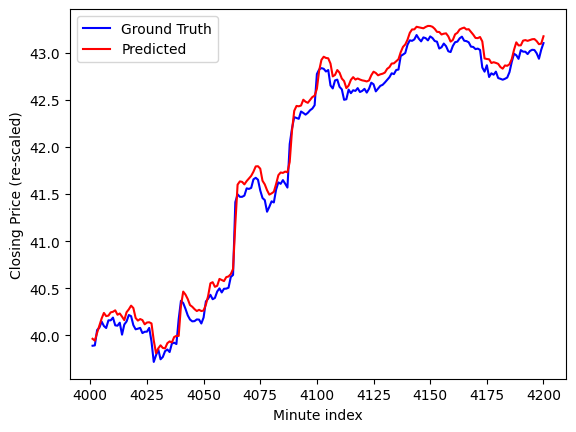

In [21]:
# plot of predicted vs ground truth values on 2017-18 data

index = np.arange(1, len(targets_array)+1)
plt.plot(index[4000:4200], targets_array[4000:4200], color = 'blue', label = 'Ground Truth')
plt.plot(index[4000:4200], outputs_array[4000:4200], color = 'red', label = 'Predicted')
plt.xlabel('Minute index')
plt.ylabel('Closing Price (re-scaled)')
plt.legend()
plt.show()

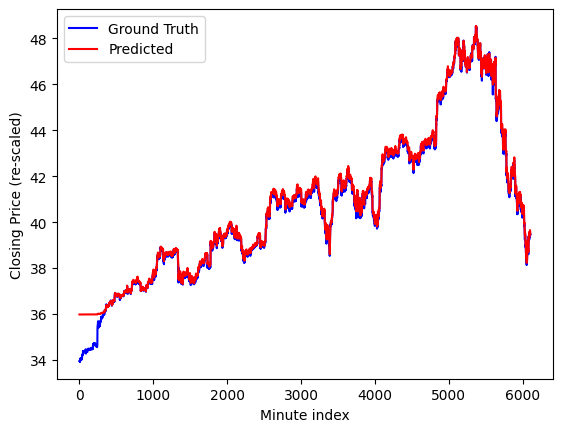

In [66]:
# plot of predicted vs ground truth values on 2017-18 data

index = np.arange(1, len(targets_array)+1)
plt.plot(index, targets_array, color = 'blue', label = 'Ground Truth')
plt.plot(index, outputs_array, color = 'red', label = 'Predicted')
plt.xlabel('Minute index')
plt.ylabel('Closing Price (re-scaled)')
plt.legend()
plt.show()

Above is the plot of Ground Truth vs Predicted closing prices (scaled) of AAPL's stock in a randomly chosen duration in 2017-2018. Except for some extreme values, the predictions are quite accurate to the ground truth values, but with a small amount of bias. I did try to train the model with several different hyperparameters. Earlier I had a lot more bias, and lesser variance in the error. This meant that the model was underfit, and thus I increased the model complexity with each try and ended up with the above fit being the best the model managed to achieve.

### Question 7

In [76]:
class Trader():

  def __init__(self, value_init, dataloader, model, stddev, mean):

    self.model = model
    self.dataloader = dataloader

    # investor details
    self.value_init = value_init     # initial value of investor
    self.value = value_init          # net value of the investor
    self.invested_value = 0          # value of investment
    self.funds_bal = value_init      # funds available to be invested
    self.num_shares = 0              # number of shares owned
    self.avg_buy_price = 0           # average price of shares owned

    # stock market parameters
    self.bid_ask_spread = 0.001
    self.trade_comission = 0.0005
    self.stddev = stddev             # std_dev of the stock price, calculated during normalization
    self.mean = mean            # mean of the stock price, calculated during normalization

  def trade(self):

    _buy = 0
    _sell = 0
    _hold = 0

    self.model.eval()
    with torch.no_grad():
      for inputs, target in self.dataloader:
        inputs = inputs.to(device)
        target = target.to(device)
        output = self.model(inputs)

        # convert from tensor to numpy
        target = target.cpu().numpy()[0][0]
        output = output.cpu().numpy()[0][0]

        # rescale back the target and output
        target = target*self.stddev + self.mean
        output = output*self.stddev + self.mean

        # buy when holding zero shares
        if self.avg_buy_price == 0:
          # buy with 5% of funds_bal
          self.buy(target, 0.05)
          _buy += 1
          continue

        # 0.2% profit margin after trade
        if self.avg_buy_price - output - (self.bid_ask_spread + self.trade_comission)*output > 0.002*self.avg_buy_price:
          self.buy(target)
          _buy += 1
        elif output - self.avg_buy_price - (self.bid_ask_spread + self.trade_comission)*output > 0.002*self.avg_buy_price:
          self.sell(target)
          _sell += 1
        else:
          # HOLD
          _hold += 1
          self.value_update(target)
          continue
    print(f'Buy triggered {_buy}, Hold triggered {_hold}, Sell triggered {_sell}')
    self.result()

  def buy(self, target, fraction = 0.6):

    if (fraction*self.funds_bal) / (target*(1 + self.bid_ask_spread + self.trade_comission)) >= 1:

      # buy fraction of remaining funds and update values
      buy_shares = np.floor(fraction*self.funds_bal / (target*(1 + self.bid_ask_spread + self.trade_comission)))
      self.avg_buy_price = (self.num_shares*self.avg_buy_price + buy_shares*target)/(self.num_shares + buy_shares)
      self.num_shares += buy_shares
      self.funds_bal -= buy_shares*target*(1 + self.bid_ask_spread + self.trade_comission)

    self.value_update(target)

  def sell(self, target, fraction=0.5):

    # fraction of stock to be sold, and make sure that at least 10% of net value is invested at all times
    if fraction*self.num_shares >= 1:

      # sell fraction of your stocks and update values
      sell_shares = np.floor(fraction*self.num_shares)
      if fraction == 1:
        self.avg_buy_price = 0
      else:
        self.avg_buy_price = self.avg_buy_price                   # doesn't change upon selling stocks
      self.num_shares -= sell_shares
      self.funds_bal += sell_shares*target*(1 - (self.bid_ask_spread + self.trade_comission))

    self.value_update(target)

  def value_update(self, target):

    self.invested_value = self.num_shares*target
    self.value = self.funds_bal + self.invested_value

  def result(self):

    # result after trading for 2 years
    print(f'Net value initial: ${self.value_init:.2f}')
    print(f'Net value final: ${self.value:.2f}')
    print(f'Invested value: ${self.invested_value:.2f}')
    print(f'Funds balance: ${self.funds_bal}')
    print(f'Compound annual interest: {((abs(self.value/self.value_init))**0.5 - 1)*100:.2f} %')

### Question 8.

(a)

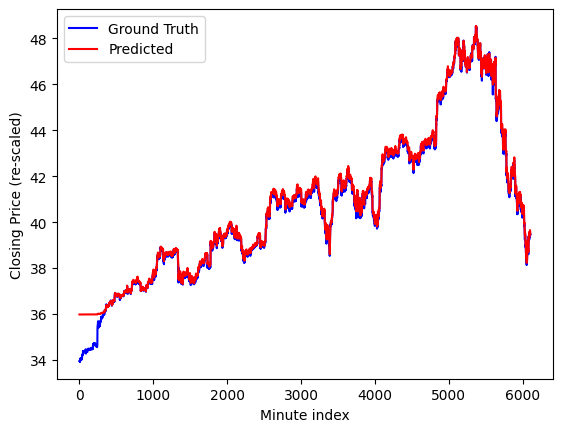

In [67]:
# plot of predicted vs ground truth values on 2017-18 data

index = np.arange(1, len(targets_array)+1)
plt.plot(index, targets_array, color = 'blue', label = 'Ground Truth')
plt.plot(index, outputs_array, color = 'red', label = 'Predicted')
plt.xlabel('Minute index')
plt.ylabel('Closing Price (re-scaled)')
plt.legend()
plt.show()

As can be seen in the plot above, no, the error in price predicted doesn't increase as we move further from the time period on which it was trained. This is owed to the well designed and trained LSTM model.

(b)

In [24]:
# No shuffle because we want the dataset to be sequential
# Also batch_size = 1 because we want to evaluate prices of each sequence one at a time

dataloader_trade = DataLoader(stock_dataset_test, batch_size=1, shuffle=False)

In [77]:
# Let the trader start with $10M
Value_init = 10000000
stddev = 2*apple_test_std_dev
mean = apple_test_mean_price

trader = Trader(Value_init, dataloader_trade, lstm, stddev, mean)
trader.trade()

Buy triggered 1, Hold triggered 0, Sell triggered 0
Net value initial: $10000000.00
Net value final: $9998786.92
Invested value: $38.28
Funds balance: $9998748.643302752
Compound annual interest: -0.01 %


As can be seen above, the trading model is not good enough to provide the best returns. It ended up giving almost zero interest/loss over two years. This is more of an issue with the decision making involved in the trading module than it is with the closing price predictor.

(c) In comparison to a simple buy-and-hold strategy over two years, my model fails to give higher profitability. While the price prediction is quite on spot, the trading module for high frequency trading is extremely fragile. I tried a lot of different parameters for decision making in the trading module but sadly none of them were good enough to provide decent returns. The best I received was an annual interest of about 10% but there I had implemented a condition to retain a certain (~50% of total value of the investor) in shares and then proceed with the HFT. But that's just like investing 50% long-term and trading at high frequency with the rest 50% money (with close to zero interest in HFT). A buy and hold strategy over a few years in a large-cap stock like Apple is bound to give 10-15% annual compound interest.

**A different approach to the trading module**

A rather different approach to setting up a trading module is to train a Reinforcement Learning model using either Q-Learning or SARSA with a DNN architecture. The inputs will be the state vector of the agent, i.e., the investor, and the outputs will be the the Q-Values of the (state, action) pairs. The state vector will comprise of the fully connected layer of the trained LSTM combined with normalized values of the funds balance, number of shares, and average buy price of shares of the investor. We choose the fully connected layer of the LSTM as part of the state vector as it is a good representation of the features of the technical details of the stock's price chart given the sequence. The rewards over each action would be the net change in the net value of the investor. Keeping the trained LSTM fixed and using it only to extract the feature vector for a particular sequence of prices, we can train this RL network to maximize the rewards and thus come up with a profitable trading algorithm. For training and testing we'd use the same datasets as the ones used for LSTM network.

### References
Resources referred to not explicitly mentioned in code blocks:
1. Pandas documentation
2. Matplotlib documentation
3. Plotly documentation
4. PyTorch documentation
5. https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/